## PHÂN TÍCH ĐƠN BIẾN

#### IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
%matplotlib inline

#### ĐỌC TẬP DỮ LIỆU BẰNG THƯ VIỆN PANDAS

In [2]:
data = pd.read_csv("E:/DA/DO_AN_CUOI_KY/DATASET/weatherUS_final.csv")
df = data.copy()
# df.head(5)
df.sample(5)

,Date,Month,Year,Location,Region,Season,MinTemp,MaxTemp,Rainfall,Sunshine,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
63007,2013-03-15,3,2013,Mildura,Southeast,Autumn,13.0,29.1,0.0,10.400000,...,15.0,15.0,61.0,26.0,1018.3,1016.5,16.5,26.9,No,No
116892,2015-03-14,3,2015,Hobart,Southeast,Autumn,11.3,19.8,0.0,1.100000,...,39.0,24.0,36.0,42.0,1007.2,1003.0,15.4,19.6,No,Yes
86445,2010-12-29,12,2010,Adelaide,South,Summer,15.4,31.2,0.0,13.300000,...,6.0,17.0,30.0,22.0,1014.1,1013.4,23.8,29.7,No,No
42893,2017-03-17,3,2017,Canberra,Southeast,Autumn,14.7,24.3,0.2,7.641785,...,20.0,19.0,75.0,52.0,1019.5,1021.4,18.2,23.0,No,No
9550,2009-01-18,1,2009,Moree,Southeast,Summer,18.5,33.3,0.0,12.200000,...,24.0,11.0,51.0,36.0,1018.1,1014.4,22.4,30.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128432 entries, 0 to 128431
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          128432 non-null  object 
 1   Month         128432 non-null  int64  
 2   Year          128432 non-null  int64  
 3   Location      128432 non-null  object 
 4   Region        128432 non-null  object 
 5   Season        128432 non-null  object 
 6   MinTemp       128432 non-null  float64
 7   MaxTemp       128432 non-null  float64
 8   Rainfall      128432 non-null  float64
 9   Sunshine      128432 non-null  float64
 10  WindDir9am    128432 non-null  object 
 11  WindDir3pm    128432 non-null  object 
 12  WindSpeed9am  128432 non-null  float64
 13  WindSpeed3pm  128432 non-null  float64
 14  Humidity9am   128432 non-null  float64
 15  Humidity3pm   128432 non-null  float64
 16  Pressure9am   128432 non-null  float64
 17  Pressure3pm   128432 non-null  float64
 18  Temp

### 1. RainTomorrow

Số lượng cho mỗi giá trị RainTomorrow:
RainTomorrow
No     100368
Yes     28064
Name: count, dtype: int64

Tỷ lệ phần trăm cho mỗi giá trị RainTomorrow:
RainTomorrow
No     78.148748
Yes    21.851252
Name: proportion, dtype: float64


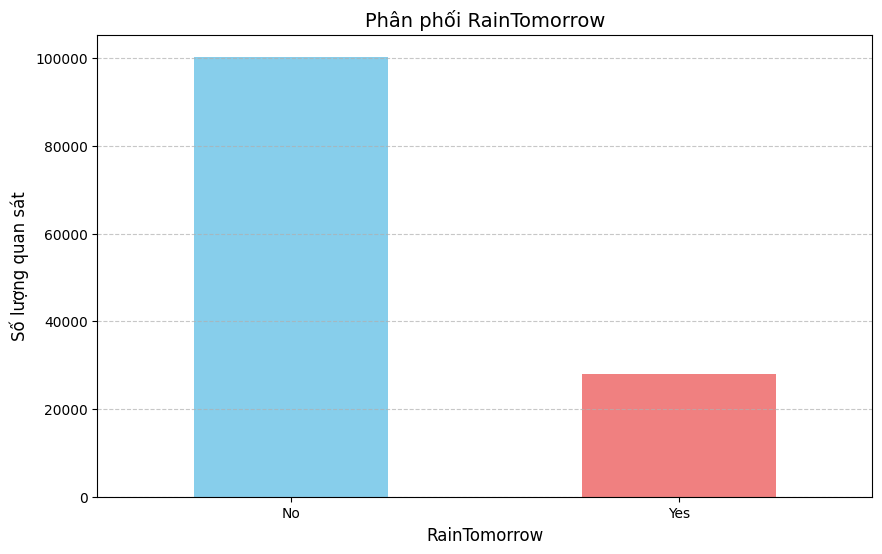

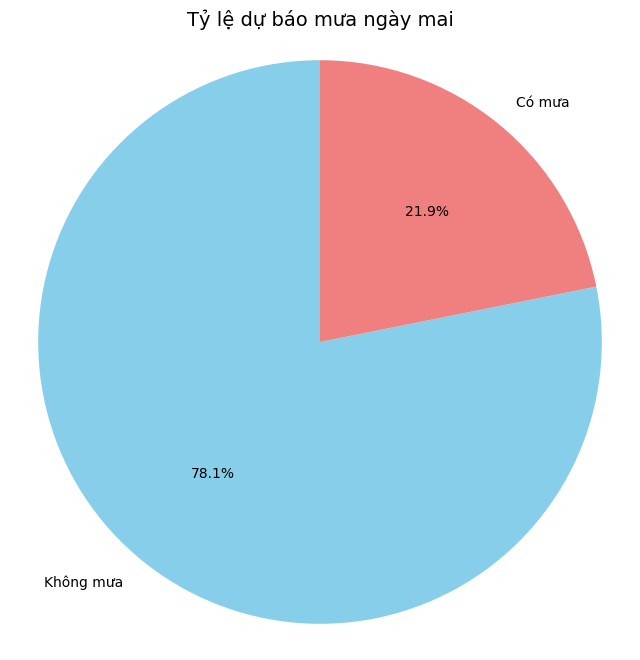

In [4]:
# Đếm số lượng và tỷ lệ của từng giá trị trong RainTomorrow
rain_tomorrow_counts = df['RainTomorrow'].value_counts()
rain_tomorrow_percentages = df['RainTomorrow'].value_counts(normalize=True) * 100

print("Số lượng cho mỗi giá trị RainTomorrow:")
print(rain_tomorrow_counts)
print("\nTỷ lệ phần trăm cho mỗi giá trị RainTomorrow:")
print(rain_tomorrow_percentages)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
rain_tomorrow_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Phân phối RainTomorrow', fontsize=14)
plt.xlabel('RainTomorrow', fontsize=12)
plt.ylabel('Số lượng quan sát', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(rain_tomorrow_percentages, 
        labels=['Không mưa', 'Có mưa'],
        colors=['skyblue', 'lightcoral'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Tỷ lệ dự báo mưa ngày mai', fontsize=14)
plt.axis('equal')
plt.show()

### 2. Nhiệt độ

#### a. MinTemp

1. Thống kê mô tả cho MinTemp:
count    128432.000000
mean         12.125058
std           6.318792
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.700000
max          33.900000
Name: MinTemp, dtype: float64




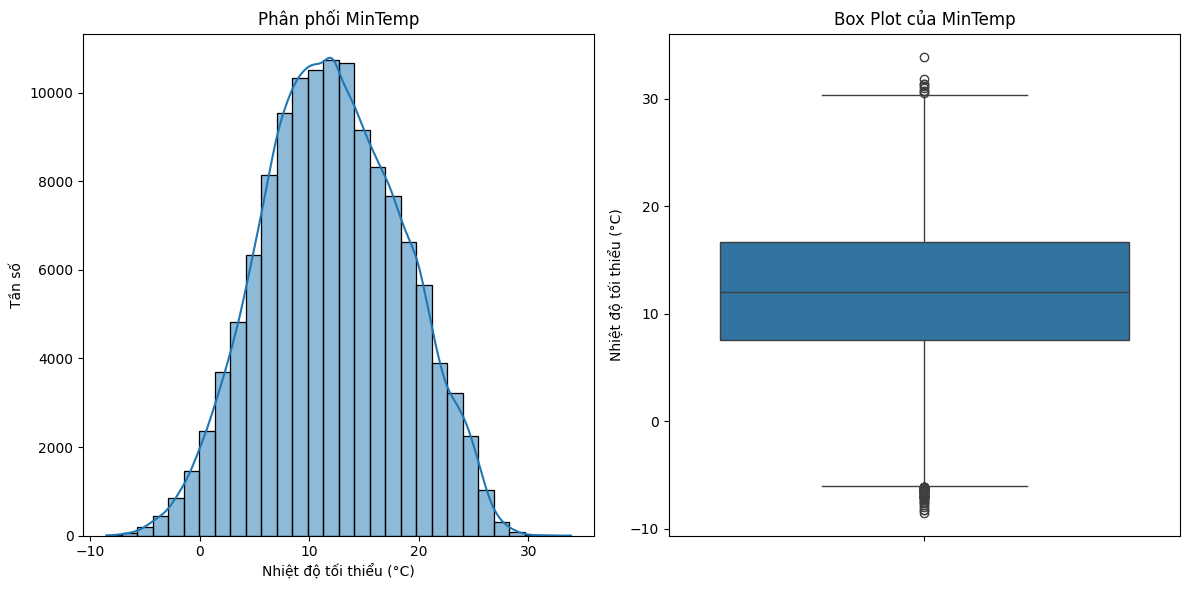

3. Kiểm tra phân phối chuẩn:
p-value: 0.0
Kết luận: Dữ liệu không tuân theo phân phối chuẩn


4. Các phân vị của MinTemp:
[-8.5  7.6 12.  16.7 33.9]


5. Thông tin về outliers:
Số lượng outliers: 60
Tỷ lệ outliers: 0.05%
Giới hạn dưới: -6.05
Giới hạn trên: 30.35


In [5]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Thống kê mô tả cơ bản
print("1. Thống kê mô tả cho MinTemp:")
print(df['MinTemp'].describe())
print("\n")

# 2. Vẽ histogram và density plot
plt.figure(figsize=(12, 6))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MinTemp', bins=30, kde=True)
plt.title('Phân phối MinTemp')
plt.xlabel('Nhiệt độ tối thiểu (°C)')
plt.ylabel('Tần số')

# Subplot 2: Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['MinTemp'])
plt.title('Box Plot của MinTemp')
plt.ylabel('Nhiệt độ tối thiểu (°C)')

plt.tight_layout()
plt.show()

# 3. Kiểm tra phân phối chuẩn
stat, p_value = stats.normaltest(df['MinTemp'].dropna())
print("3. Kiểm tra phân phối chuẩn:")
print(f"p-value: {p_value}")
print("Kết luận: Dữ liệu", "tuân theo phân phối chuẩn" if p_value > 0.05 else "không tuân theo phân phối chuẩn")
print("\n")

# 4. Tính toán các phân vị
print("4. Các phân vị của MinTemp:")
percentiles = [0, 25, 50, 75, 100]
print(np.percentile(df['MinTemp'].dropna(), percentiles))
print("\n")

# 5. Phát hiện outliers
Q1 = df['MinTemp'].quantile(0.25)
Q3 = df['MinTemp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MinTemp'] < lower_bound) | (df['MinTemp'] > upper_bound)]['MinTemp']
print("5. Thông tin về outliers:")
print(f"Số lượng outliers: {len(outliers)}")
print(f"Tỷ lệ outliers: {(len(outliers)/len(df['MinTemp']))*100:.2f}%")
print(f"Giới hạn dưới: {lower_bound:.2f}")
print(f"Giới hạn trên: {upper_bound:.2f}")

#### Tổng số ghi nhận quan sát thời tiết có nhiệt độ tối thiểu thấp hơn mức trung bình

In [6]:
# Tính giá trị trung bình của cột MinTemp
average_min_temp = df['MinTemp'].mean()

# Tạo một Series Boolean để kiểm tra các giá trị nhỏ hơn trung bình
below_average = df['MinTemp'] < average_min_temp

# Đếm số lượng giá trị True (tức là số lần nhiệt độ thấp hơn trung bình)
count_below_average = below_average.sum()

print("Tổng số ghi nhận có nhiệt độ tối thiểu thấp hơn mức trung bình:", count_below_average)

Tổng số ghi nhận có nhiệt độ tối thiểu thấp hơn mức trung bình: 65484


In [7]:
# Tính số lần nhiệt độ tối thiểu nhỏ hơn hoặc bằng 0
count_min_temp_leq_0 = df[df['MinTemp'] <= 0].shape[0]

print("Tổng số ghi nhận có nhiệt độ tối thiểu <= 0:", count_min_temp_leq_0)

Tổng số ghi nhận có nhiệt độ tối thiểu <= 0: 3164


#### Tổng số ghi nhận quan sát thời tiết có nhiệt độ tối thiểu cao hơn mức trung bình

In [8]:
# Tính nhiệt độ tối thiểu trung bình
avg_min_temp = df['MinTemp'].mean()

# Tính số lượng các dòng có nhiệt độ tối thiểu cao hơn trung bình
count_above_avg = df[df['MinTemp'] > avg_min_temp].shape[0]

print("Số lượng ghi nhận có nhiệt độ tối thiểu cao hơn mức trung bình:", count_above_avg)

Số lượng ghi nhận có nhiệt độ tối thiểu cao hơn mức trung bình: 62948


#### b. MaxTemp

1. Thống kê mô tả cho MaxTemp:
count    128432.000000
mean         23.200658
std           7.009719
min          -4.800000
25%          18.000000
50%          22.700000
75%          28.100000
max          48.100000
Name: MaxTemp, dtype: float64




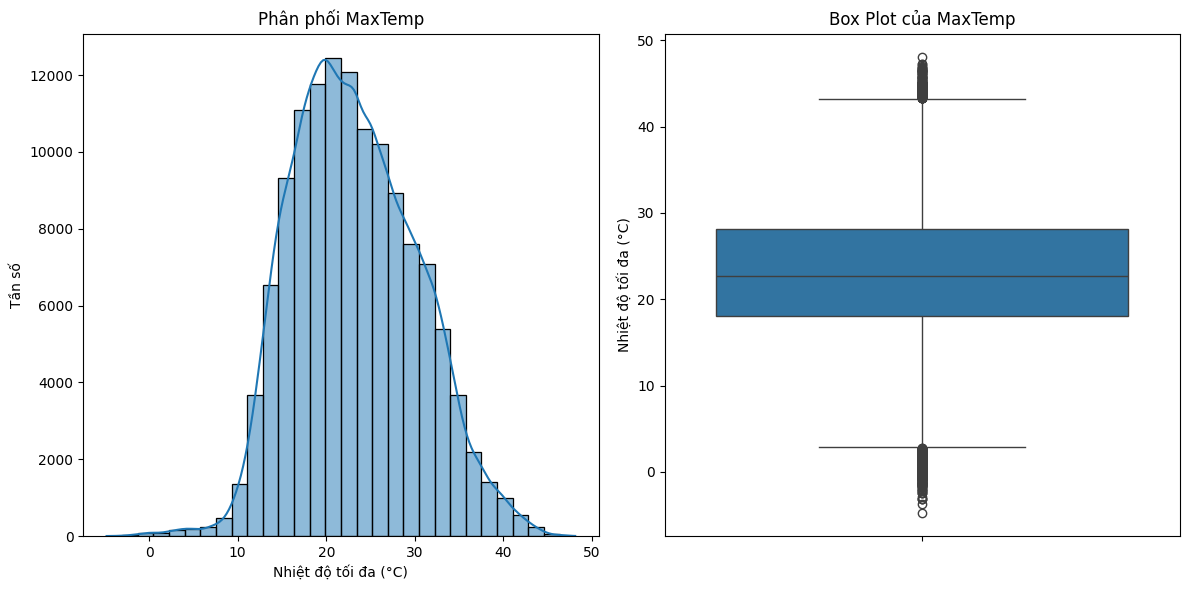

3. Kiểm tra phân phối chuẩn:
p-value: 0.0
Kết luận: Dữ liệu không tuân theo phân phối chuẩn


4. Các phân vị của MaxTemp:
[-4.8 18.  22.7 28.1 48.1]


5. Thông tin về outliers:
Số lượng outliers: 452
Tỷ lệ outliers: 0.35%
Giới hạn dưới: 2.85
Giới hạn trên: 43.25


In [9]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Thống kê mô tả cơ bản
print("1. Thống kê mô tả cho MaxTemp:")
print(df['MaxTemp'].describe())
print("\n")

# 2. Vẽ histogram và boxplot
plt.figure(figsize=(12, 6))

# Subplot 1: Histogram với density plot
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MaxTemp', bins=30, kde=True)
plt.title('Phân phối MaxTemp')
plt.xlabel('Nhiệt độ tối đa (°C)')
plt.ylabel('Tần số')

# Subplot 2: Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['MaxTemp'])
plt.title('Box Plot của MaxTemp')
plt.ylabel('Nhiệt độ tối đa (°C)')

plt.tight_layout()
plt.show()

# 3. Kiểm tra phân phối chuẩn
stat, p_value = stats.normaltest(df['MaxTemp'].dropna())
print("3. Kiểm tra phân phối chuẩn:")
print(f"p-value: {p_value}")
print("Kết luận: Dữ liệu", "tuân theo phân phối chuẩn" if p_value > 0.05 else "không tuân theo phân phối chuẩn")
print("\n")

# 4. Tính toán các phân vị
print("4. Các phân vị của MaxTemp:")
percentiles = [0, 25, 50, 75, 100]
print(np.percentile(df['MaxTemp'].dropna(), percentiles))
print("\n")

# 5. Phát hiện outliers
Q1 = df['MaxTemp'].quantile(0.25)
Q3 = df['MaxTemp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MaxTemp'] < lower_bound) | (df['MaxTemp'] > upper_bound)]['MaxTemp']
print("5. Thông tin về outliers:")
print(f"Số lượng outliers: {len(outliers)}")
print(f"Tỷ lệ outliers: {(len(outliers)/len(df['MaxTemp']))*100:.2f}%")
print(f"Giới hạn dưới: {lower_bound:.2f}")
print(f"Giới hạn trên: {upper_bound:.2f}")

#### Tổng số ghi nhận quan sát thời tiết có nhiệt độ tối đa thấp hơn mức trung bình

In [10]:
# Tính nhiệt độ tối đa trung bình
avg_max_temp = df['MaxTemp'].mean()

# Đếm số lượng ghi nhận có nhiệt độ tối đa thấp hơn trung bình
count_below_avg = df[df['MaxTemp'] < avg_max_temp]['MaxTemp'].count()

print("Tổng số ghi nhận có nhiệt độ tối đa thấp hơn mức trung bình:", count_below_avg)

Tổng số ghi nhận có nhiệt độ tối đa thấp hơn mức trung bình: 68204


#### Tổng số ghi nhận quan sát thời tiết có nhiệt độ tối đa cao hơn mức trung bình

In [11]:
# Lọc dữ liệu có nhiệt độ tối đa cao hơn trung bình
high_temp_data = df[df['MaxTemp'] > avg_max_temp]

# Đếm số lượng ghi nhận
count_high_temp = len(high_temp_data)

print("Tổng số ghi nhận có nhiệt độ tối đa cao hơn mức trung bình:", count_high_temp)

Tổng số ghi nhận có nhiệt độ tối đa cao hơn mức trung bình: 60228


### 3. Mùa (Season) 

#### a. Tổng số lần ghi nhận quan sát thời tiết theo mùa

In [22]:
# Tính số lượng và phần trăm cho từng mùa
season_counts = df['Season'].value_counts()
season_percentages = df['Season'].value_counts(normalize=True) * 100

# Hiển thị kết quả
for season in season_counts.index:
    print(f"{season}: {season_counts[season]} ({season_percentages[season]:.1f}%)")

Autumn: 31697 (24.7%)
Winter: 30065 (23.4%)
Spring: 29496 (23.0%)
Summer: 29430 (22.9%)
Dry: 4041 (3.1%)
Wet: 3703 (2.9%)


C:\Users\panh2\AppData\Local\Temp\ipykernel_8656\4247023493.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v, f'{season_percentages[i]:.1f}%',


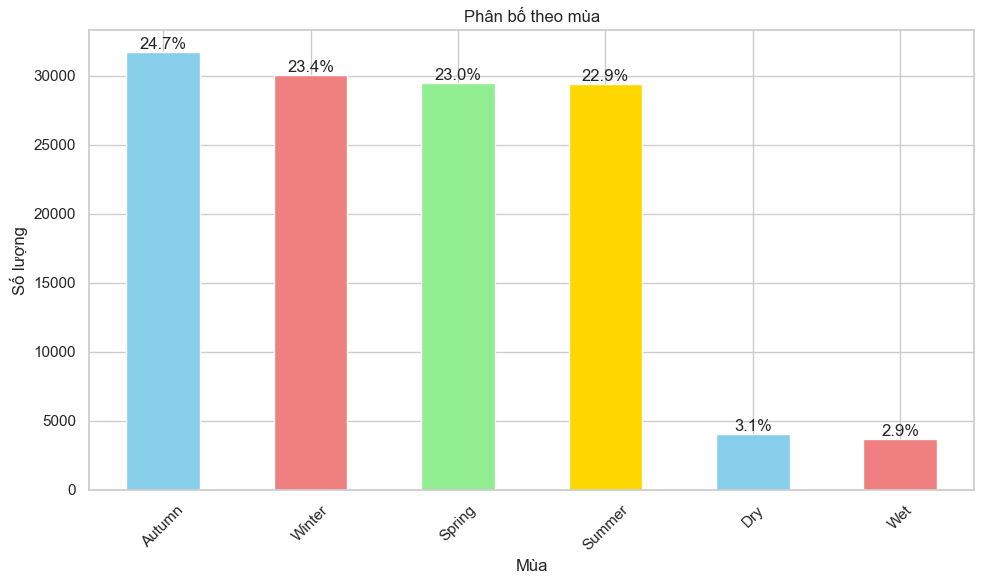

In [21]:
import matplotlib.pyplot as plt

# Tạo biểu đồ cột với phần trăm
plt.figure(figsize=(10, 6))
ax = season_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Phân bố theo mùa')
plt.xlabel('Mùa')
plt.ylabel('Số lượng')

# Thêm nhãn phần trăm trên mỗi cột
for i, v in enumerate(season_counts):
    ax.text(i, v, f'{season_percentages[i]:.1f}%', 
            ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Lượng mưa (Rainfall)

In [15]:

df['MaxTemp'].describe()

count    128432.000000
mean         23.200658
std           7.009719
min          -4.800000
25%          18.000000
50%          22.700000
75%          28.100000
max          48.100000
Name: MaxTemp, dtype: float64

In [16]:
# Tính tổng số ngày quan sát
total_days = len(df)
print("Tổng số ngày quan sát:", total_days)

# Tính số ngày có mưa (dựa trên cột Rainfall)
rainy_days = df[df['Rainfall'] > 0].shape[0]
print("Số ngày có mưa (dựa trên cột Rainfall):", rainy_days)

# Tính số ngày không mưa (dựa trên cột Rainfall)
dry_days = total_days - rainy_days
print("Số ngày không mưa (dựa trên cột Rainfall):", dry_days)


Tổng số ngày quan sát: 128432
Số ngày có mưa (dựa trên cột Rainfall): 46565
Số ngày không mưa (dựa trên cột Rainfall): 81867


Số ngày có lượng mưa dưới mức trung bình ( 0.5 mm): 93432
Số ngày có lượng mưa trên hoặc bằng mức trung bình ( 0.5 mm): 35000


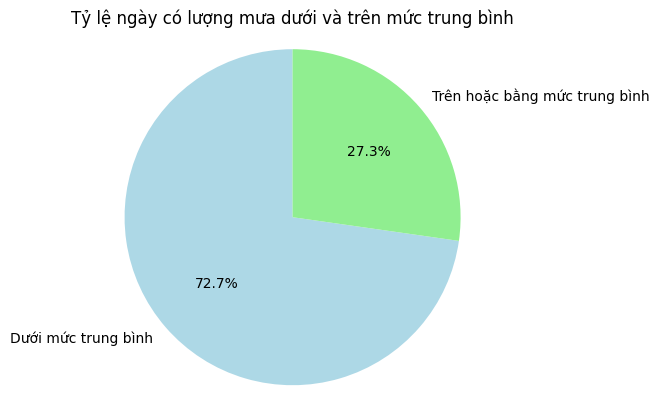

In [17]:
# Xác định mức trung bình lượng mưa
threshold = 0.5

# Tính số ngày có lượng mưa dưới mức trung bình
below_average_days = df[df['Rainfall'] < threshold].shape[0]
print("Số ngày có lượng mưa dưới mức trung bình (", threshold, "mm):", below_average_days)

# Tính số ngày có lượng mưa trên hoặc bằng mức trung bình
above_or_equal_average_days = df[df['Rainfall'] >= threshold].shape[0]
print("Số ngày có lượng mưa trên hoặc bằng mức trung bình (", threshold, "mm):", above_or_equal_average_days)

# Tính tổng số ngày
total_days = len(df)

# Tính phần trăm
percentage_below_average = (below_average_days / total_days) * 100
percentage_above_or_equal_average = (above_or_equal_average_days / total_days) * 100

# Tạo dữ liệu cho biểu đồ
labels = ['Dưới mức trung bình', 'Trên hoặc bằng mức trung bình']
sizes = [percentage_below_average, percentage_above_or_equal_average]
colors = ['lightblue', 'lightgreen']

# Vẽ biểu đồ tròn
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Để hình tròn đều
plt.title('Tỷ lệ ngày có lượng mưa dưới và trên mức trung bình')
plt.show()

C:\Users\panh2\AppData\Local\Temp\ipykernel_8656\1701065628.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rainy_days, hist = False, color = 'blue')


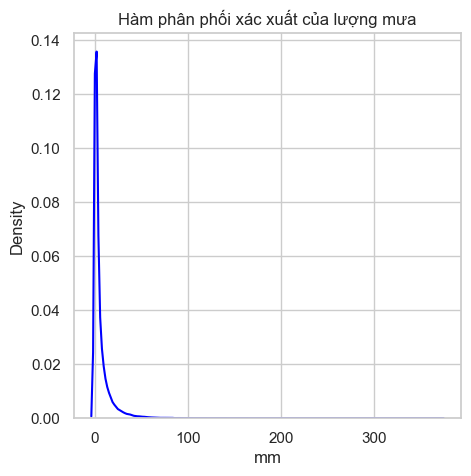

In [18]:
#Biểu đồ phân phối
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

rainy_days = df.loc[(df['Rainfall'] !=0)]['Rainfall']
sns.distplot(rainy_days, hist = False, color = 'blue')


# Thêm nhãn và tên 2 trục
plt.xlabel('mm')
plt.ylabel('Density')
plt.title('Hàm phân phối xác xuất của lượng mưa')


plt.show()

- Nhận xét :
    + Phân phối lệch phải: Đường cong có dạng đuôi dài về phía bên phải, cho thấy phần lớn các ngày có lượng mưa thấp hoặc trung bình, nhưng có một số ngày lượng mưa rất cao. Điều này là đặc trưng của nhiều hiện tượng tự nhiên, bao gồm cả lượng mưa.
    + Đỉnh cao: Điểm cao nhất của đường cong cho biết giá trị lượng mưa phổ biến nhất, tức là lượng mưa xảy ra thường xuyên nhất trong khoảng thời gian được xét.
    + Độ dốc: Độ dốc của đường cong thể hiện tốc độ thay đổi của mật độ xác suất khi lượng mưa tăng lên. Ở những vùng có độ dốc lớn, sự thay đổi của mật độ xác suất là nhanh chóng, nghĩa là lượng mưa thay đổi đáng kể trong một khoảng giá trị nhỏ.

-> Có thể cho thấy khí hậu khô hạn với những cơn mưa đột ngột và mạnh.

### 5. Độ ẩm

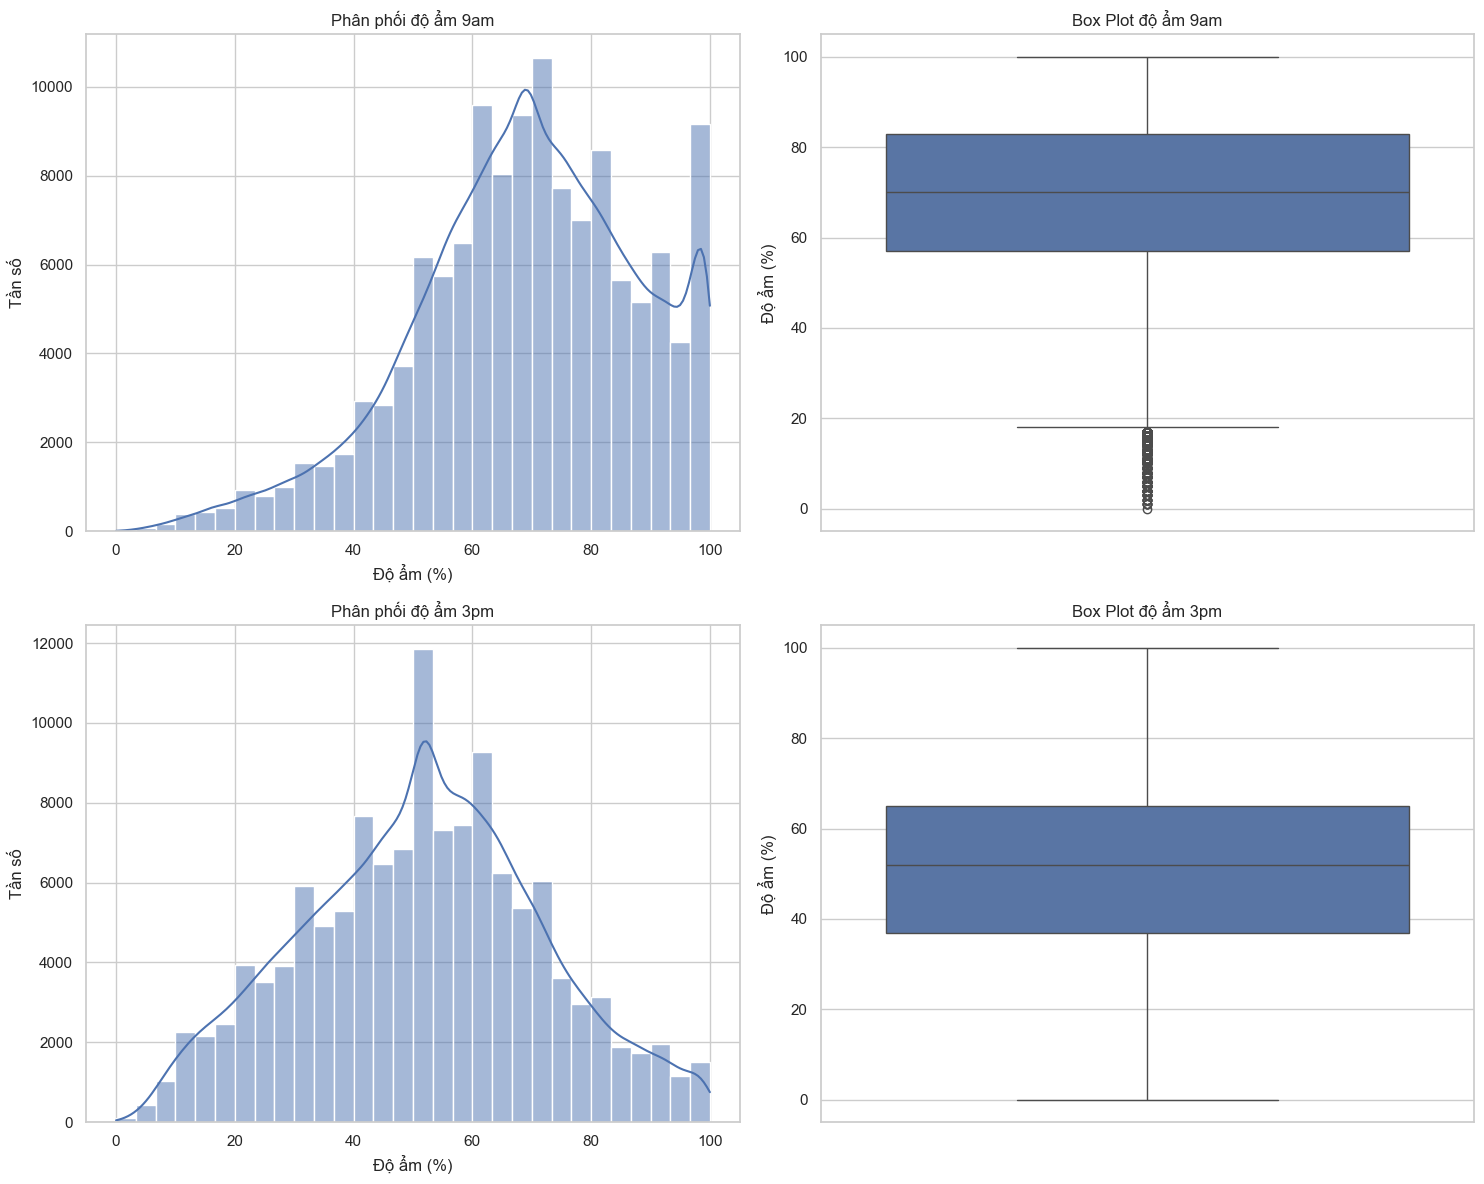


Thống kê mô tả cho Humidity9am:
count    128432.000000
mean         68.919421
std          18.802949
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64

Thống kê mô tả cho Humidity3pm:
count    128432.000000
mean         51.555189
std          20.247293
min           0.000000
25%          37.000000
50%          52.000000
75%          65.000000
max         100.000000
Name: Humidity3pm, dtype: float64

Kiểm tra phân phối chuẩn:
Humidity9am p-value: 0.0
Humidity3pm p-value: 0.0

Thông tin outliers cho Humidity9am:
Số lượng outliers: 1248
Tỷ lệ outliers: 0.97%
Giới hạn dưới: 18.00
Giới hạn trên: 122.00

Thông tin outliers cho Humidity3pm:
Số lượng outliers: 0
Tỷ lệ outliers: 0.00%
Giới hạn dưới: -5.00
Giới hạn trên: 107.00


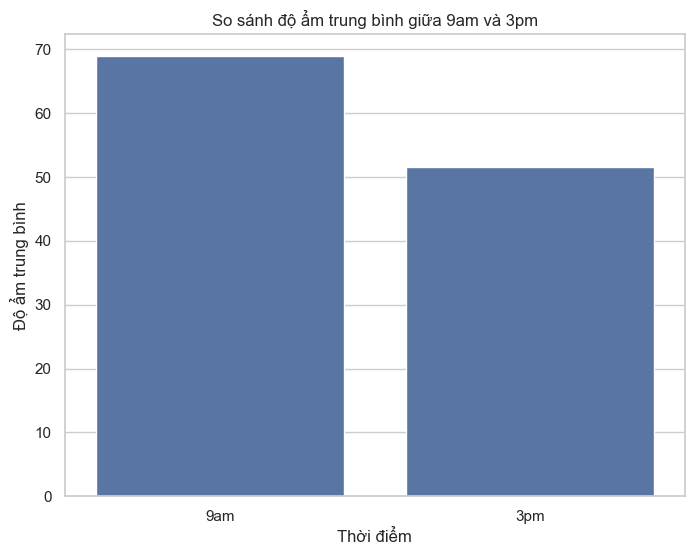

In [19]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Tạo subplot cho cả 2 biến độ ẩm
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Phân tích Humidity9am
# Histogram và density plot
sns.histplot(data=df, x='Humidity9am', bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Phân phối độ ẩm 9am')
axes[0,0].set_xlabel('Độ ẩm (%)')
axes[0,0].set_ylabel('Tần số')

# Box plot
sns.boxplot(y=df['Humidity9am'], ax=axes[0,1])
axes[0,1].set_title('Box Plot độ ẩm 9am')
axes[0,1].set_ylabel('Độ ẩm (%)')

# 2. Phân tích Humidity3pm
# Histogram và density plot
sns.histplot(data=df, x='Humidity3pm', bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title('Phân phối độ ẩm 3pm')
axes[1,0].set_xlabel('Độ ẩm (%)')
axes[1,0].set_ylabel('Tần số')

# Box plot
sns.boxplot(y=df['Humidity3pm'], ax=axes[1,1])
axes[1,1].set_title('Box Plot độ ẩm 3pm')
axes[1,1].set_ylabel('Độ ẩm (%)')

plt.tight_layout()
plt.show()

# Thống kê mô tả
print("\nThống kê mô tả cho Humidity9am:")
print(df['Humidity9am'].describe())
print("\nThống kê mô tả cho Humidity3pm:")
print(df['Humidity3pm'].describe())

# Kiểm tra phân phối chuẩn
stat9am, p_value9am = stats.normaltest(df['Humidity9am'].dropna())
stat3pm, p_value3pm = stats.normaltest(df['Humidity3pm'].dropna())

print("\nKiểm tra phân phối chuẩn:")
print(f"Humidity9am p-value: {p_value9am}")
print(f"Humidity3pm p-value: {p_value3pm}")

# Phát hiện outliers
def get_outliers_info(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    
    print(f"\nThông tin outliers cho {column}:")
    print(f"Số lượng outliers: {len(outliers)}")
    print(f"Tỷ lệ outliers: {(len(outliers)/len(data[column]))*100:.2f}%")
    print(f"Giới hạn dưới: {lower_bound:.2f}")
    print(f"Giới hạn trên: {upper_bound:.2f}")

get_outliers_info(df, 'Humidity9am')
get_outliers_info(df, 'Humidity3pm')

# So sánh độ ẩm trung bình
plt.figure(figsize=(8, 6))
avg_humidity = pd.DataFrame({
    'Thời điểm': ['9am', '3pm'],
    'Độ ẩm trung bình': [df['Humidity9am'].mean(), df['Humidity3pm'].mean()]
})
sns.barplot(data=avg_humidity, x='Thời điểm', y='Độ ẩm trung bình')
plt.title('So sánh độ ẩm trung bình giữa 9am và 3pm')
plt.show()

### 6. Áp suất

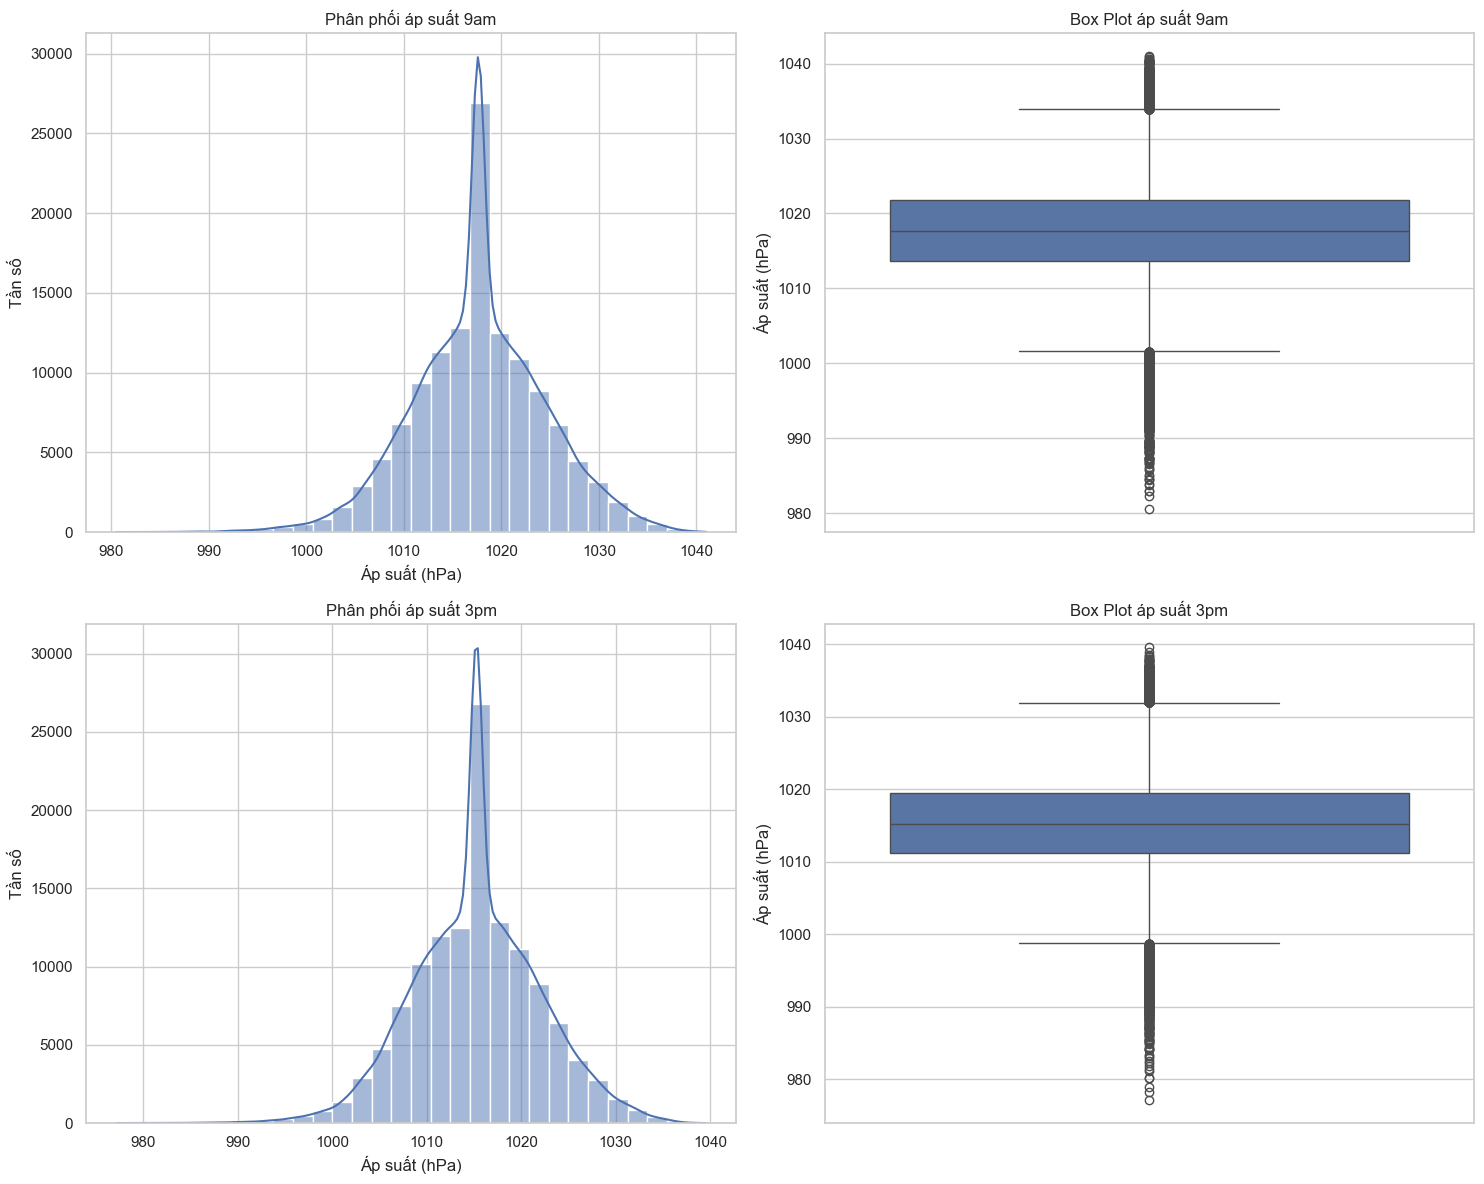


Thống kê mô tả cho Pressure9am:
count    128432.000000
mean       1017.719730
std           6.708403
min         980.500000
25%        1013.700000
50%        1017.642104
75%        1021.800000
max        1041.000000
Name: Pressure9am, dtype: float64

Thống kê mô tả cho Pressure3pm:
count    128432.000000
mean       1015.321995
std           6.656769
min         977.100000
25%        1011.200000
50%        1015.263738
75%        1019.500000
max        1039.600000
Name: Pressure3pm, dtype: float64

Kiểm tra phân phối chuẩn:
Pressure9am p-value: 3.74175278670883e-309
Pressure3pm p-value: 5.386732422880694e-212

Thông tin outliers cho Pressure9am:
Số lượng outliers: 2746
Tỷ lệ outliers: 2.14%
Giới hạn dưới: 1001.55
Giới hạn trên: 1033.95

Thông tin outliers cho Pressure3pm:
Số lượng outliers: 2223
Tỷ lệ outliers: 1.73%
Giới hạn dưới: 998.75
Giới hạn trên: 1031.95


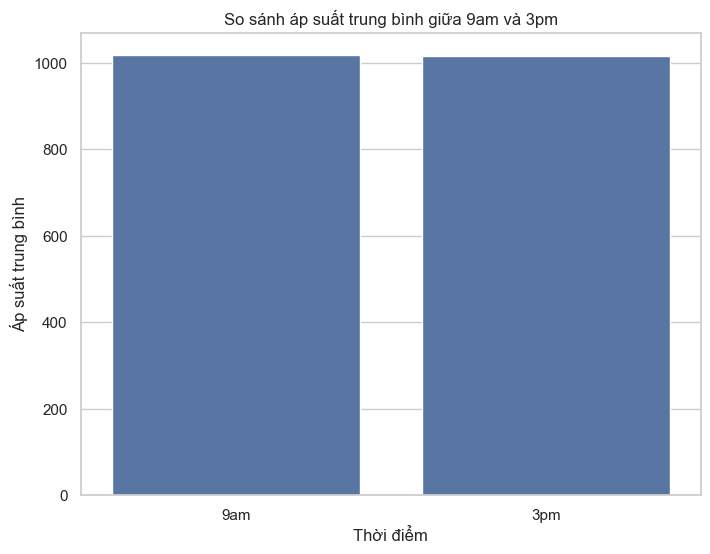

In [20]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Tạo subplot cho cả 2 biến áp suất
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Phân tích Pressure9am
# Histogram và density plot
sns.histplot(data=df, x='Pressure9am', bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Phân phối áp suất 9am')
axes[0,0].set_xlabel('Áp suất (hPa)')
axes[0,0].set_ylabel('Tần số')

# Box plot
sns.boxplot(y=df['Pressure9am'], ax=axes[0,1])
axes[0,1].set_title('Box Plot áp suất 9am')
axes[0,1].set_ylabel('Áp suất (hPa)')

# 2. Phân tích Pressure3pm
# Histogram và density plot
sns.histplot(data=df, x='Pressure3pm', bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title('Phân phối áp suất 3pm')
axes[1,0].set_xlabel('Áp suất (hPa)')
axes[1,0].set_ylabel('Tần số')

# Box plot
sns.boxplot(y=df['Pressure3pm'], ax=axes[1,1])
axes[1,1].set_title('Box Plot áp suất 3pm')
axes[1,1].set_ylabel('Áp suất (hPa)')

plt.tight_layout()
plt.show()

# Thống kê mô tả
print("\nThống kê mô tả cho Pressure9am:")
print(df['Pressure9am'].describe())
print("\nThống kê mô tả cho Pressure3pm:")
print(df['Pressure3pm'].describe())

# Kiểm tra phân phối chuẩn
stat9am, p_value9am = stats.normaltest(df['Pressure9am'].dropna())
stat3pm, p_value3pm = stats.normaltest(df['Pressure3pm'].dropna())

print("\nKiểm tra phân phối chuẩn:")
print(f"Pressure9am p-value: {p_value9am}")
print(f"Pressure3pm p-value: {p_value3pm}")

# Phát hiện outliers
def get_outliers_info(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    
    print(f"\nThông tin outliers cho {column}:")
    print(f"Số lượng outliers: {len(outliers)}")
    print(f"Tỷ lệ outliers: {(len(outliers)/len(data[column]))*100:.2f}%")
    print(f"Giới hạn dưới: {lower_bound:.2f}")
    print(f"Giới hạn trên: {upper_bound:.2f}")

get_outliers_info(df, 'Pressure9am')
get_outliers_info(df, 'Pressure3pm')

# So sánh áp suất trung bình
plt.figure(figsize=(8, 6))
avg_pressure = pd.DataFrame({
    'Thời điểm': ['9am', '3pm'],
    'Áp suất trung bình': [df['Pressure9am'].mean(), df['Pressure3pm'].mean()]
})
sns.barplot(data=avg_pressure, x='Thời điểm', y='Áp suất trung bình')
plt.title('So sánh áp suất trung bình giữa 9am và 3pm')
plt.show()

### 7. Tốc độ gió